In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#After the training has been done. 
M_50 = np.load('malicious_50.npy')
B_50 = np.load('benign_50.npy')
A_50 = np.load('adversarial_50.npy')
M_50 = M_50[:1000]
B_50 = B_50[:1000]
A_50 = A_50[:1000]

In [13]:
#Calculating number of 1s in total for each column for each of the data samples(Malign, Benign, Adversarial).
MC_50=M_50.sum(axis=0)
BC_50=B_50.sum(axis=0)
AC_50=A_50.sum(axis=0)

### Differences in counts between Adversarial and Malicious.

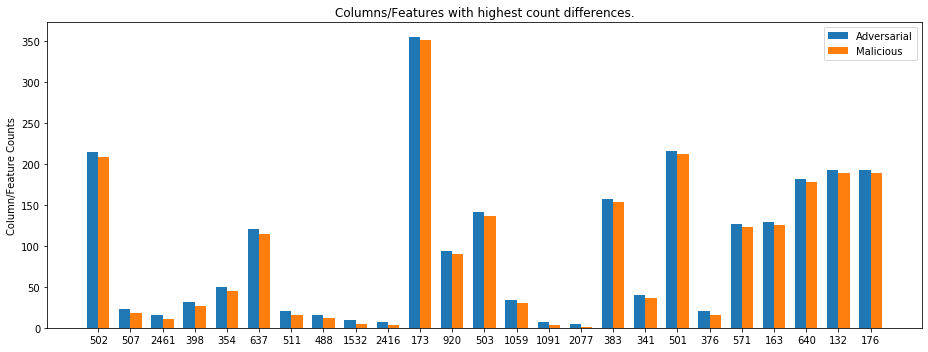

In [21]:
diffM_A_50=abs(MC_50 - AC_50)
indicesM_A_50=diffM_A_50.argsort()[::-1][:25]
MCn_50 = MC_50[indicesM_A_50]
ACn_50 = AC_50[indicesM_A_50]

columns = indicesM_A_50
Adversarial_counts = ACn_50
Malicious_counts = MCn_50

x = np.arange(len(columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width/2, Adversarial_counts, width, label='Adversarial')
rects2 = ax.bar(x + width/2, Malicious_counts, width, label='Malicious')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Column/Feature Counts')
ax.set_title('Columns/Features with highest count differences.')
ax.set_xticks(x)
ax.set_xticklabels(columns)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

### Differences in counts between Adversarial and Benign.

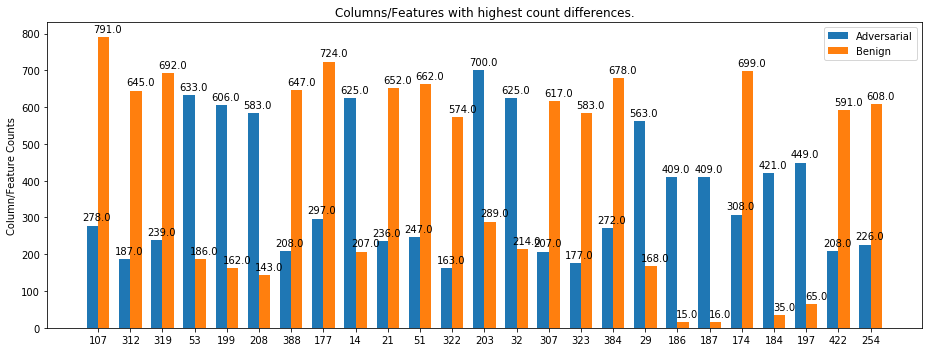

In [22]:
diffB_A_50=abs(BC_50 - AC_50)
indicesB_A_50=diffB_A_50.argsort()[::-1][:25]
BCn_50 = BC_50[indicesB_A_50]
ACn_50 = AC_50[indicesB_A_50]

columns = indicesB_A_50
Adversarial_counts = ACn_50
Benign_counts = BCn_50

x = np.arange(len(columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13,5))
rects1 = ax.bar(x - width/2, Adversarial_counts, width, label='Adversarial')
rects2 = ax.bar(x + width/2, Benign_counts, width, label='Benign')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Column/Feature Counts')
ax.set_title('Columns/Features with highest count differences.')
ax.set_xticks(x)
ax.set_xticklabels(columns)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(4.25,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [23]:
import SimpSOM as sps

In [24]:
train=np.array(M_50)

In [25]:
net = sps.somNet(20, 20, train, PBC=True)
net.train(0.01, 20)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


In [26]:
net.save("weights")

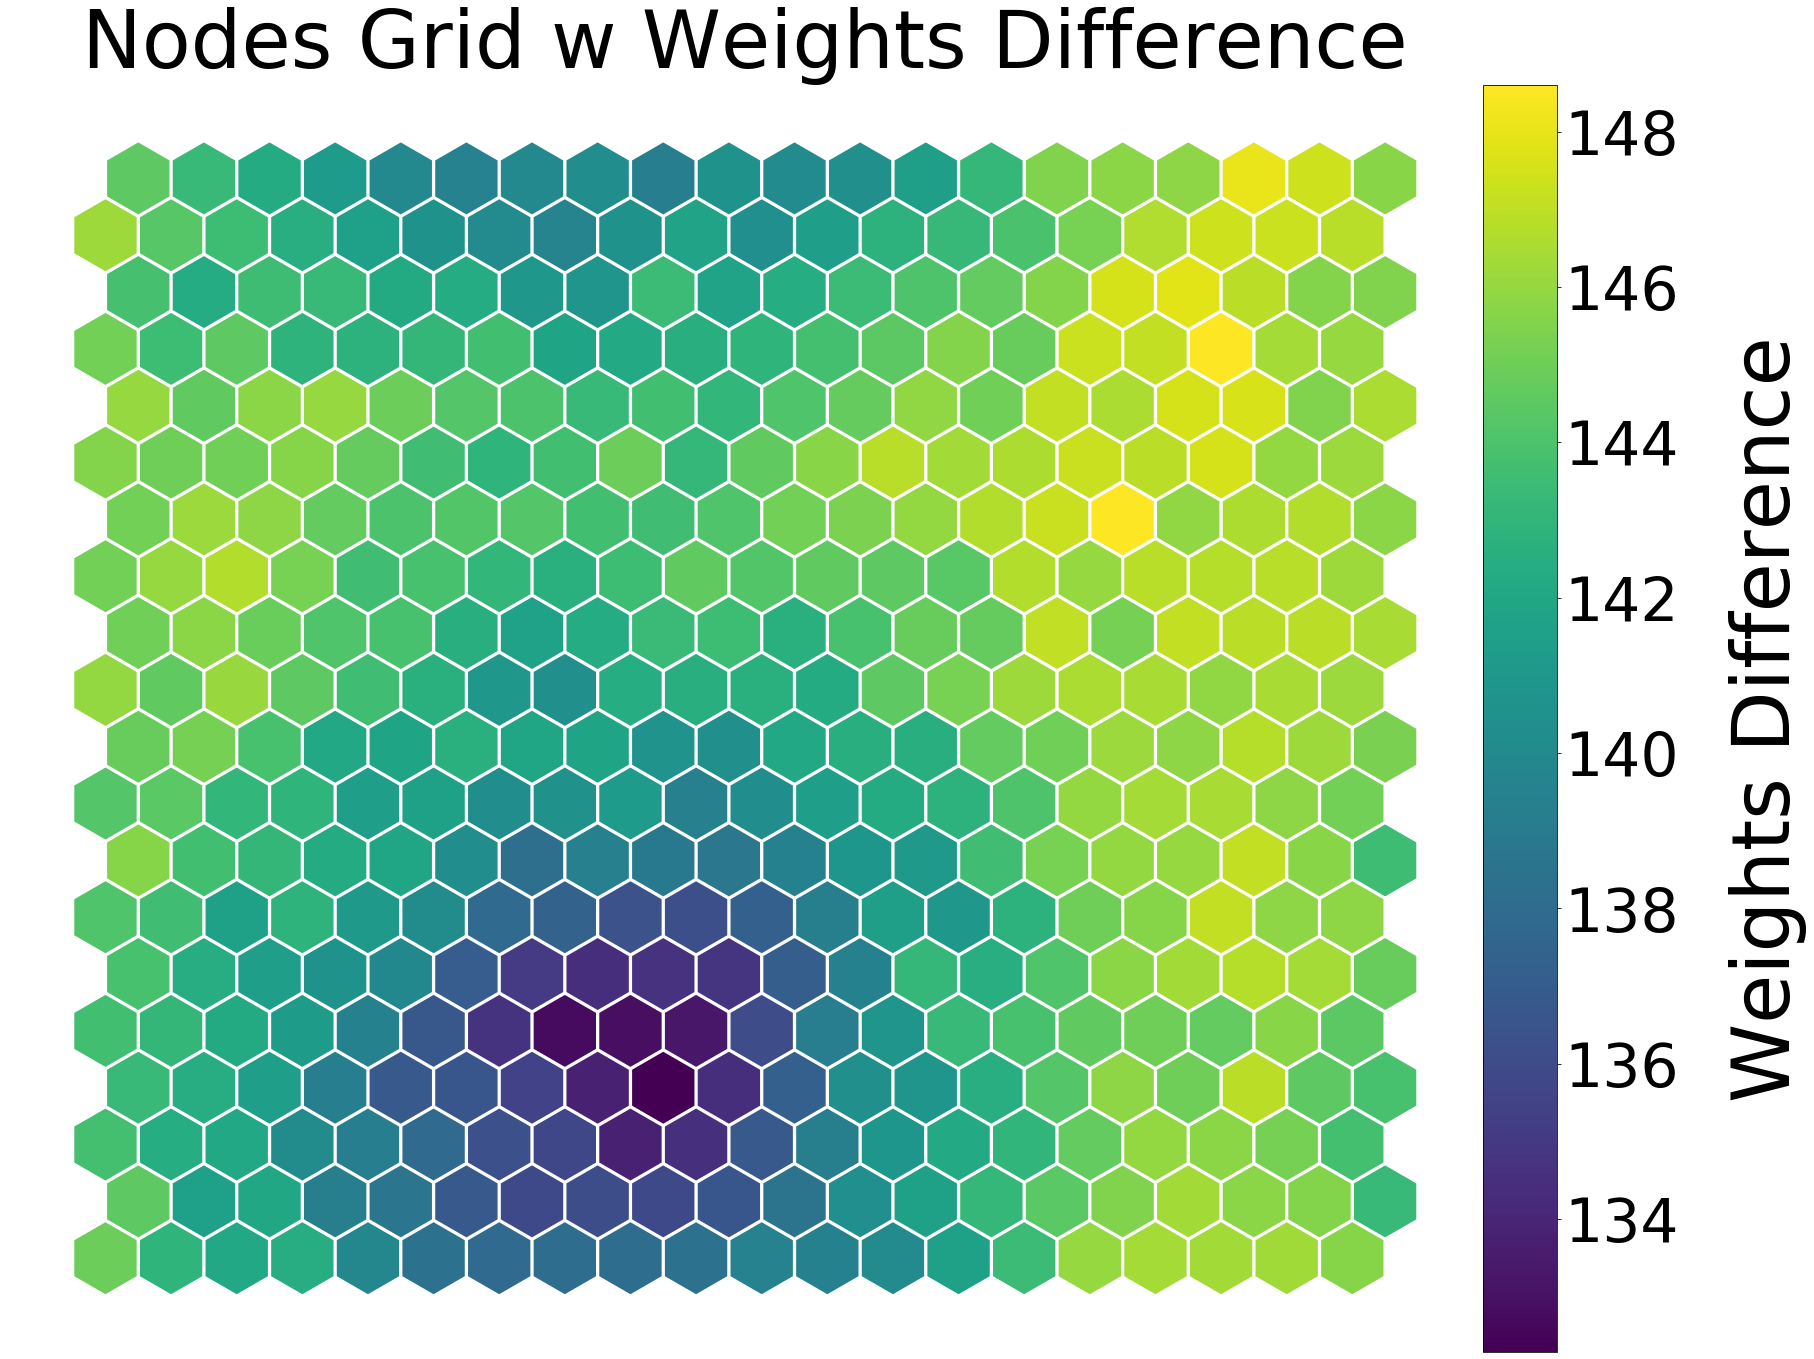

In [27]:
net.diff_graph()

In [28]:
train=np.array(B_50)

In [29]:
net = sps.somNet(20, 20, train, PBC=True)
net.train(0.01, 20)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


In [30]:
net.save("weights1")

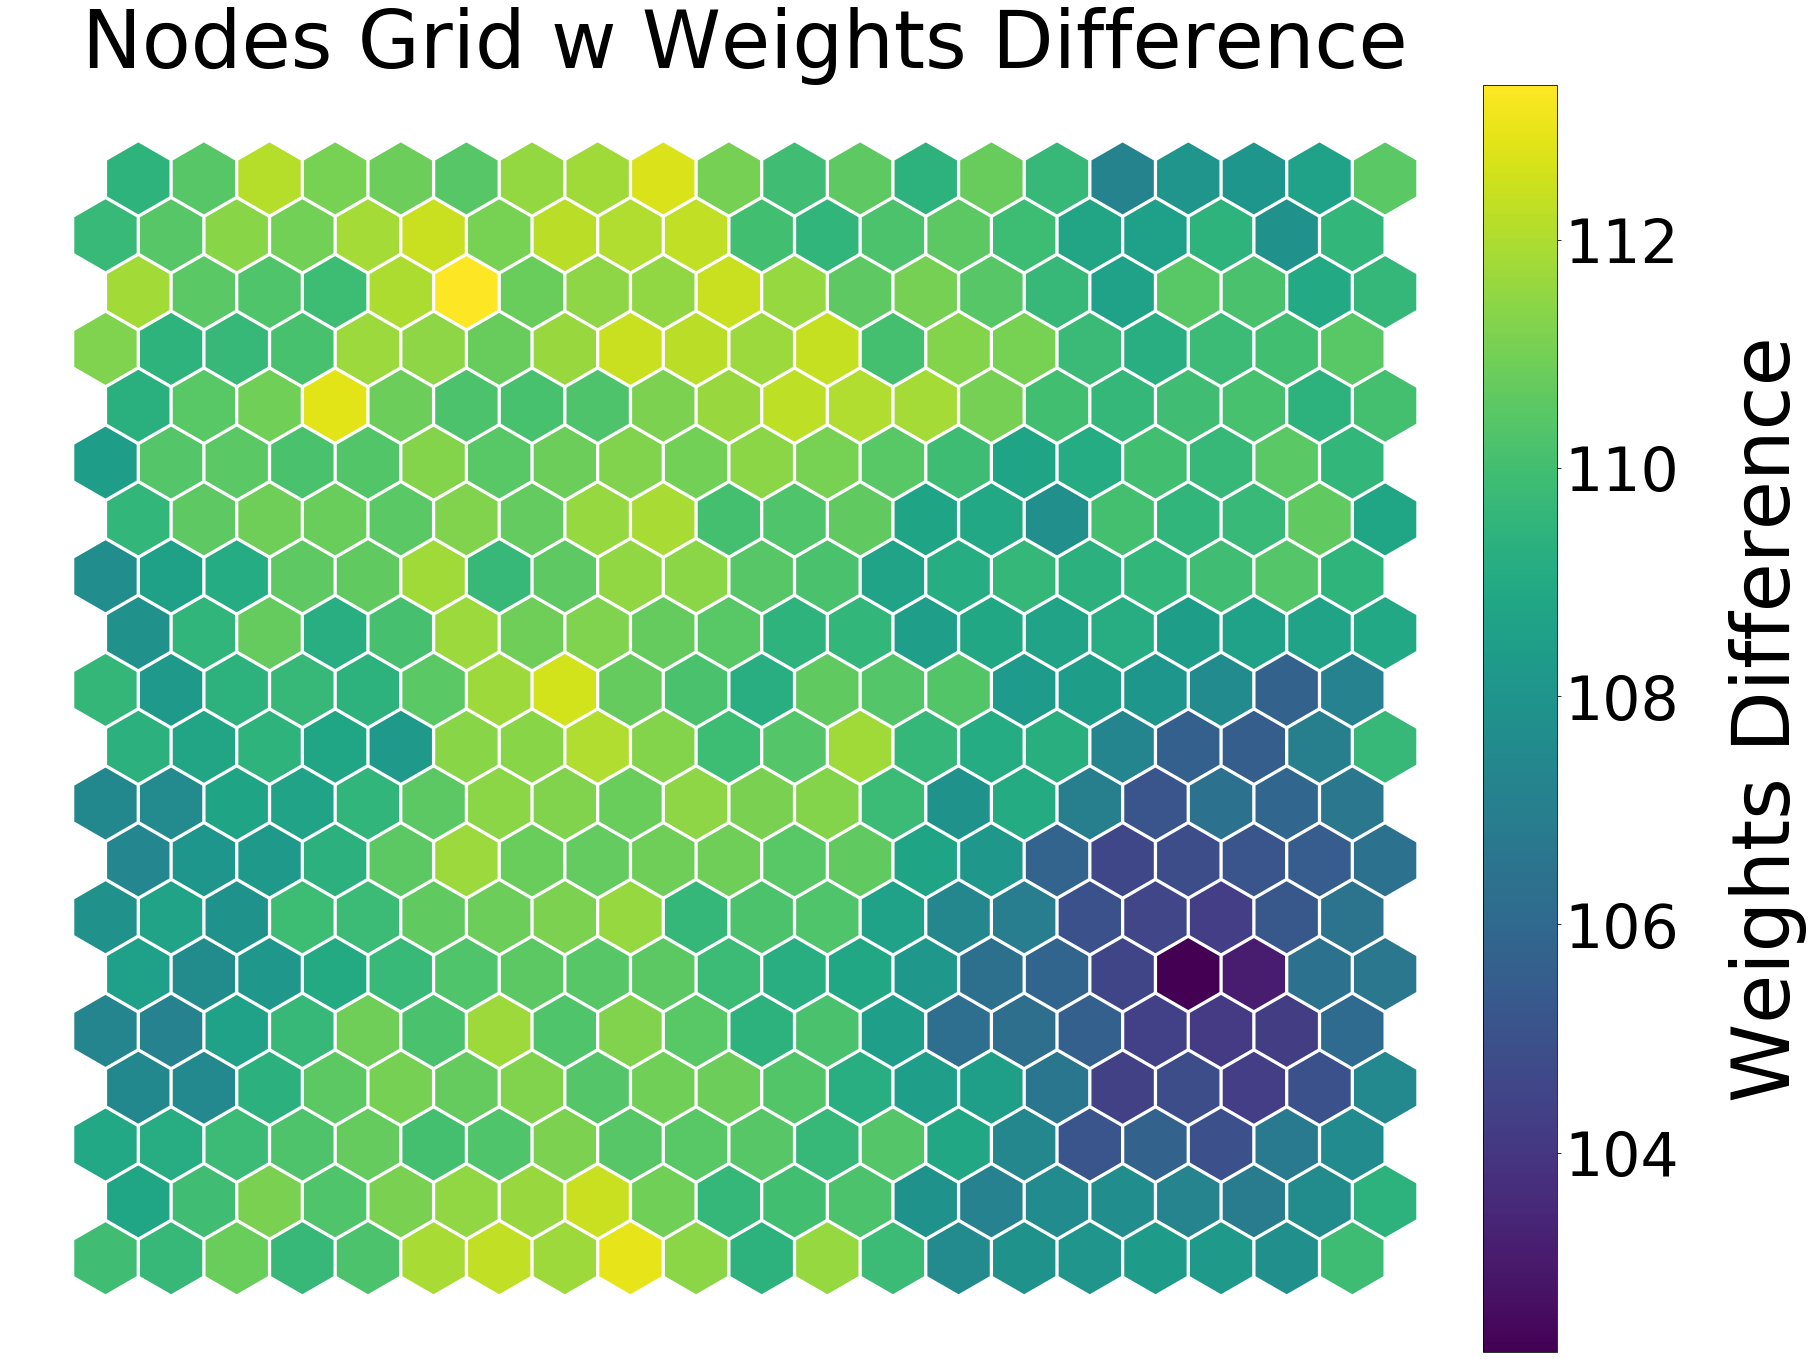

In [31]:
net.diff_graph()

In [32]:
train=np.array(A_50)

In [ ]:
net = sps.somNet(20, 20, train, PBC=True)
net.train(0.01, 20)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... 0% 

In [ ]:
net.save("weights2")

In [ ]:
net.diff_graph()